# Object References, Mutability, and Recycling

In [2]:
a = [1, 2, 3] 
b = a
a.append(4)
b
# 變數的參照如下圖

[1, 2, 3, 4]

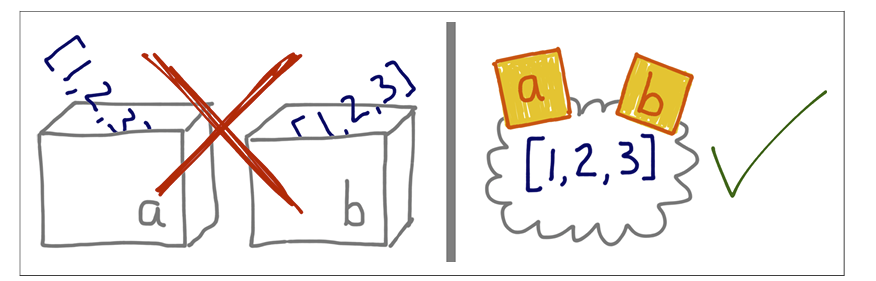

Python 中的變數並不像一般人想像的那樣，是一個儲存資料的「盒子」。相反地，它們更像是一個貼在物件上的「標籤」（label）或是指向物件的「參考」（reference）。在 Python 中，當你執行賦值操作時，並不是將資料從一個「盒子」複製到另一個「盒子」，而是將一個「標籤」綁定（bind）到一個既有的物件上。

Python 中的賦值操作 
1. 右側表達式先被評估或創建物件：無論右側是一個字面值、一個函數呼叫、還是一個運算，它都會先被執行，產生一個物件。
2. 左側變數名稱被綁定到該物件：一旦物件被準備好，左側的變數名稱（標籤）就會被綁定到這個物件。

##  Identity, Equality, and Aliases

1. 物件身分 (Identity)
    - 定義： 物件的身分一旦建立就永遠不會改變。您可以將它想像成物件在記憶體中的位址。
    - 檢查方式：
        - is 運算子：用於比較兩個物件的身分。如果 a is b 為 True，表示 a 和 b 指向記憶體中的同一個物件。
        - id() 函式：回傳一個整數，代表物件的身分。在 CPython 中，這個整數通常是物件的記憶體位址，但在其他 Python 解譯器中可能有所不同。
    - 實務應用： 通常我們不需要直接使用 id() 函式，is 運算子已經足夠。
2. 物件相等性 (Equality)
    - 定義： 相等性是指兩個物件所「包含的值」是否相同。
    - 檢查方式：
        - == 運算子：用於比較兩個物件的值。預設情況下，object 類別繼承的 `__eq__` 方法會比較物件的身分，但大多數內建型別（如 list, dict, str）都會覆寫 `__eq__` 來實現更有意義的值比較。
    - 實務應用： 在程式碼中，我們通常更關心物件的值是否相等，因此 == 運算子比 is 更常出現。
3. 別名 (Aliases)
    - 定義： 當多個變數指向記憶體中的同一個物件時，這些變數就互為別名。
    - 行為： 透過任何一個別名對物件進行的修改，都會反映在所有其他別名上，因為它們都操作的是同一個物件。

In [ ]:
charles = {'name': 'Charles L. Dodgson', 'born': 1832}
lewis = charles
print(lewis is charles)

print(id(charles), id(lewis))
lewis['balance'] = 950 
print(charles)

True
137815013979136 137815013979136
{'name': 'Charles L. Dodgson', 'born': 1832, 'balance': 950}


####  運算子：物件身份的判斷
`is` 運算子用於判斷兩個變數是否引用（refer）同一個物件，也就是它們是否共享相同的物件身份（identity）。
1. 物件身份 (Identity)：
    - 每個 Python 物件在被建立後，其身份永不改變。你可以將其視為物件在記憶體中的位址。
    - id() 函數會回傳一個整數來代表物件的身份，在 CPython 中，這通常是物件在記憶體中的位址。
    - is 運算子就是透過比較兩個物件的 id() 值來判斷它們的身份是否相同。
2. 效能與不可重載性 (Non-Overloadable)：
    - is 運算子無法被重載（overloaded），因此 Python 無需尋找或呼叫特殊方法來評估它。
    - 它的計算非常簡單，僅僅是比較兩個整數（物件 ID），所以通常比 == 運算子更快。
3. 主要使用場景 (Singletons)：
    - is 運算子最常見且推薦的用法是檢查一個變數是否綁定到一個單例（singleton）物件。
    - 最普遍的例子是判斷變數是否為 None：x is None。其否定形式應寫作 x is not None。
    - 此外，哨兵物件（sentinel objects）也是使用 is 進行測試的另一個有效場景。
    - Raymond Hettinger 建議，is None 是 is 運算子唯一常見的正確使用場景。
4. 潛在的誤用與陷阱 (Misuse)：
    - 除了檢查 None 之外，大多數情況下使用 is 來比較物件都是錯誤的。如果你不確定，請使用 ==。
    - Python 會對小整數和某些字串字面值進行「駐留」（interning）優化。這意味著不同的變數引用看似獨立的字面值時，它們可能實際上引用的是同一個物件，導致 is 回傳 True。然而，這種行為是 CPython 的實現細節，不應依賴，因為它可能隨 Python 版本或執行環境而改變。因此，即使 s1 = 'ABC' 和 s2 = 'ABC' 可能會導致 s1 is s2 為 True，也不應依賴此行為。

#### 運算子：物件值的判斷
== 運算子用於比較兩個物件的值（value），也就是它們所包含的數據是否相等。
1. 物件值 (Value)：
    - == 運算子是 `a.__eq__(b)` 的語法糖。
    - 它旨在比較兩個物件的內容或語義上的等價性。
2. 可重載性 (Overloadable)：
    - 你可以透過在自定義類別中實現 `__eq__` 特殊方法來重載 == 運算子，以定義物件相等性的邏輯。
    - 大多數內建類型都重載了 `__eq__`，以提供有意義的比較。例如，兩個列表如果內容相同，即使它們是不同的物件，== 也會回傳 True。
3. 預設行為 (Default Behavior)：
    - 如果一個類別沒有實現自己的 `__eq__` 方法，它將繼承自 object 類別的 `__eq__` 方法。
    - `object.__eq__` 的預設行為是比較物件的身份（ID），與 is 運算子相同。這意味著，如果兩個物件不是同一個實例，預設情況下它們將不相等。
4. 複合物件與淺拷貝 (Compound Objects & Shallow Copies)：
    - == 的比較對於包含其他物件的複合物件（如列表、字典、元組）而言，可能涉及大量處理，特別是當結構龐大或深度巢狀時。
    - 即使是「不可變」的元組，如果其內部引用了可變物件，當這些可變物件的值改變時，元組的「值」也會跟著改變，進而影響 == 的比較結果。例如：
5. NotImplemented 與反向操作 (Reversed Operations)：
    - 當 `__eq__` 方法無法處理另一個運算元的類型時，它應該回傳 NotImplemented 這個特殊單例值。這會告知 Python 嘗試呼叫另一個運算元（右運算元）的 `__eq__` 方法，並交換兩個運算元的位置來進行比較。
    - 這種機制允許在處理混合類型比較時有更大的靈活性。如果所有嘗試都回傳 NotImplemented，對於 == 運算子，Python 最後會退回到比較物件 ID 的方式。
    - 通常，如果 `__eq__` 方法被定義且沒有回傳 NotImplemented，則 `__ne__`（不等於）方法會自動回傳 `__eq__` 結果的否定值，因此通常不需要單獨實現 `__ne__`。


| 特性     | `is` 運算子                                  | `==` 運算子                                 |
| :------- | :------------------------------------------- | :------------------------------------------ |
| **用途** | 比較物件身份（Identity）               | 比較物件值（Value）                    |
| **判斷** | 是否引用同一個記憶體位址 (ID)         | 是否內容相等或語義等價                |
| **重載** | 不可重載                               | 可透過 `__eq__` 特殊方法重載        |
| **速度** | 通常更快，因為僅比較整數 ID           | 可能較慢，涉及自定義邏輯和遞歸比較    |
| **預設** | 預設比較 ID，等同於 `id(a) == id(b)`   | 繼承 `object.__eq__` 時比較 ID        |
| **場景** | 判斷單例物件，最常見是 `x is None` | 判斷物件內容是否相等，最常用且期望行為 |

#### The Relative Immutability of Tuples 

**元組儲存的是「參考」，而非物件本身**

當我們說一個物件是「容器（container）」(`list`、`dict`...)時，它實際儲存的是對其他物件的「參考（references）」，而不是那些被包含物件的實際值。元組，就像列表（lists）、字典（dicts）和集合（sets）一樣，都是容器。這意味著一個元組內部儲存的不是它的元素本身，而是指向這些元素的記憶體位址（即物件身份）。

當我們說元組是「不可變的（immutable）」時，它的不可變性指的是 元組資料結構的「物理內容」，也就是它所持有的這些「物件參考」是不可改變的。這表示：
- 你不能增加、刪除元組中的元素。
- 你不能替換元組中任何位置的元素參考。

然而，這種不可變性並不延伸到這些參考所指向的「被參考物件」本身。如果元組中包含了可變（mutable）的物件（例如列表、字典或自定義的可變類別實例），那麼這些可變物件的「值」是可以在原處被修改的，即使元組本身保持不變。


1. == (相等性) 與 is (身份) 運算子：
    - 這個範例完美地展示了 `==` 和 `is` 之間的區別。`==`比較的是物件的值，而 `is` 比較的是物件的身份（ID）。
    - 在範例中，`t1 == t2` 的結果從 True 變為 False，是因為 t1 的「值」改變了。但 `id(t1[-1])` 始終保持不變，因為列表物件的「身份」沒有改變。
    - 資深開發者應謹記，除了單例（singleton）物件（例如 None）的判斷，大多數情況下都應使用 == 來比較物件內容，而非 `is`。
2. 雜湊性（Hashability）：
    - *元組的相對不可變性直接影響其雜湊性*。
    - 在 Python 中，一個物件必須是「雜湊的（hashable）」才能被用作字典的鍵（dict keys）或集合的元素（set elements）。
    - 根據定義，一個物件是雜湊的，如果它的雜湊碼（hash code）在其生命週期內永不改變，且能與其他物件進行比較 (`__eq__` 方法)。
    - 如果一個元組包含任何可變的元素（例如列表），那麼這個元組就是不可雜湊的，因為它的「值」可能在被創建後發生變化，這違反了雜湊性的要求。
    - 你可以使用內建的 `hash()` 函數來檢查一個物件是否可雜湊。如果物件不可雜湊，hash() 會引發 TypeError 異常。
3. 增廣賦值運算子（Augmented Assignment Operators）：
    - 這種元組的特性也是「A += Assignment Puzzler」（增廣賦值謎題）背後的原理。在該謎題中，一個元組內部的列表被 += 修改了，但由於元組本身是不可變的，對元組元素直接進行 t += 卻會引發 TypeError，因為元組不支援項目賦值。然而，在錯誤發生之前，內部列表的修改已經完成，這就是由於 Python 的字節碼執行順序造成的。


In [1]:
t1 = (1, 2, [5, 6])
t2 = (1, 2, [5, 6])
print(t1 == t2)

print(id(t1[-1]))

t1[-1].append(99) 
print(t1)

print(id(t1[-1]))

print(t1 == t2)

True
124640959909824
(1, 2, [5, 6, 99])
124640959909824
False


### Copies Are Shallow by Default

這個章節主要闡述了 Python 預設的複製行為 — **淺拷貝（shallow copy）**，以及它在處理包含可變（mutable）元素的資料結構時可能導致的問題。

#### 1. 什麼是淺拷貝 (Shallow Copy)？
淺拷貝機制會複製外部容器本身，但對於容器內部所包含的元素，它並不會進行遞迴複製，而是只複製這些元素的**引用（references）**。這意味著，原始容器與淺拷貝後的容器雖然是兩個獨立的物件，但它們內部共享著相同子物件的引用。

*   **舉例來說**：你有一個盒子 `A`，裡面裝著一些物品，其中一個物品是一個更小的盒子 `B`。你對盒子 `A` 進行淺拷貝得到盒子 `A'`，那麼 `A'` 將是一個新盒子，但裡面的物品（包括小盒子 `B`）仍然是**與原始盒子 `A` 共享的同一個小盒子 `B`**。

#### 2. 如何創建淺拷貝？
在 Python 中，有幾種常見的方式可以創建淺拷貝：
*   **使用型別建構函式 (Type Constructor)**：例如，對於列表 `l1`，使用 `l2 = list(l1)` 會創建 `l1` 的淺拷貝。
*   **使用切片操作 (Slice Notation)**：對於列表或其他可變序列，`l2 = l1[:]` 也能達到淺拷貝的效果。
*   **使用 `copy.copy()` 函式**：這是 `copy` 模組中專門用於淺拷貝的函式，適用於任意物件。

這些方法都會產生一個新的外層容器，但新容器中的元素引用與原始容器中的元素引用是相同的。

#### 3. 淺拷貝的影響：特別是對於可變元素
淺拷貝的預設行為在很多情況下是高效且無害的。例如，如果容器中只包含不可變（immutable）的元素（如數字、字串或只包含不可變元素的元組），那麼淺拷貝通常不會引發問題，因為這些元素本身無法被修改，所以共享引用沒有風險。

然而，當容器中包含**可變元素**時，淺拷貝就會帶來「令人不愉快的驚喜」：
*   **外層容器的修改**：如果修改的是**外層容器本身**（例如，對列表進行 `append` 或 `remove` 操作），那麼原始容器和淺拷貝後的容器會獨立變化，互不影響。
    *   範例：`l1.append(100)` 只會影響 `l1`，`l2` 不變。
*   **共享可變子元素的修改**：如果修改的是**共享的可變子元素**（例如，嵌套的列表），那麼無論是透過原始容器還是淺拷貝後的容器來修改，都會影響到**兩者**，因為它們都指向**同一個可變子物件**。
    *   範例：
        ```python
        l1 = [3,[55, 44], (7, 8, 9)]
        l2 = list(l1)  # l2 是 l1 的淺拷貝
        # 此時 l1 和 l2 內部的 都變成了
        # 因為 l1 和 l2 指向同一個列表物件
        ```
*   **可變子元素的增廣賦值 (Augmented Assignment)**：對於可變物件（如列表），增廣賦值運算符 (`+=`, `*=`) 會**原地修改**物件。因此，如果共享的可變子物件被增廣賦值修改，其影響也會在所有引用它的地方體現出來。
    *   範例：
        ```python
        l1 = [3,[55, 44], (7, 8, 9)]
        l2 = list(l1)
        l2 += [333]
        # l2 (也是 l1) 會被原地修改為
        ```
*   **不可變子元素的增廣賦值**：這是一個特別的細節。對於不可變物件（如元組），增廣賦值運算符不會原地修改，而是會**創建一個新的物件並重新綁定引用**。
    *   範例：
        ```python
        l1 = [3,[55, 44], (7, 8, 9)]
        l2 = list(l1)
        l2[2] += (10, 11)
        # l2 會被重新綁定到一個新的元組 (7, 8, 9, 10, 11)。
        # 但 l1 仍然指向原始的元組 (7, 8, 9)，因為元組是不可變的，無法原地修改。
        ```
        這個例子清楚地顯示了 `l2` 現在指向一個新的元組，而 `l1` 則保持不變，因為元組的 `+=` 操作實際上是創建了一個新元組並重新賦值，而不是原地修改。

#### 4. 何時需要深拷貝 (Deep Copy)？
由於淺拷貝在處理包含可變元素的嵌套資料結構時會帶來上述問題，為了避免意外的副作用你需要一個完全獨立的副本，包括所有嵌套子物件的副本時，就需要使用**深拷貝**。深拷貝會遞迴地複製所有子物件，確保新舊物件之間沒有任何共享引用。`copy` 模組提供了 `copy.deepcopy()` 函式來實現這個目的。

#### 5. 工程實踐中的考量
作為開發過產品的資深工程師，我會強調以下幾點：
*   **意識先行**：在處理包含嵌套列表、字典等可變物件的資料結構時，始終要意識到 Python 的預設拷貝行為是淺拷貝。
*   **避免副作用**：你的函式或方法會接收可變物件作為參數，並且可能在內部修改這些參數的嵌套可變部分，那麼最好在函式內部先進行深拷貝，以避免對呼叫者的原始資料造成意外的修改。這符合「防禦性程式設計」的原則。
*   **文件化**你的類別或函式返回一個淺拷貝的物件，且該物件可能包含可變元素時，務必在文件（docstring）中明確說明這一點，以便使用者了解其行為。
*   **效能與記憶體**：深拷貝會消耗更多的記憶體和 CPU 時間，因為它需要遞迴地創建所有子物件的副本。因此，只在確實需要完全獨立副本時才使用深拷貝，否則淺拷貝是更有效率的選擇。

理解淺拷貝和深拷貝的差異，是掌握 Python 物件模型，並編寫健壯、可預測程式碼的關鍵一步。它直接關你如何安全地操作資料結構，尤其是在狀態管理和避免隱藏副作用的場景中。

In [2]:
l1 = [3,[55, 44], (7, 8, 9)]
l2 = list(l1)
print(l2)
print(l2 == l1)

[3, [55, 44], (7, 8, 9)]
True


In [3]:
l1 = [3,[55, 44], (7, 8, 9)]
l2 = list(l1)
l2 += [333]
print(l1)
print(l2)
print(l2 == l1)

[3, [55, 44], (7, 8, 9)]
[3, [55, 44], (7, 8, 9), 333]
False


In [6]:
l1 = [3,[55, 44], (7, 8, 9)]
l2 = list(l1)
l2[2] += (10, 11)

print(l1)
print(l2)
print(l2 == l1)
print(id(l2))
print(id(l1))

[3, [55, 44], (7, 8, 9)]
[3, [55, 44], (7, 8, 9, 10, 11)]
False
124640957942016
124640957951872


### Function Parameters as References

Python 的參數傳遞模型，即 **Call by Sharing (傳遞共享引用)**，以及這種模型在處理可變（mutable）和不可變（immutable）引數時的不同影響。這對於理解程式碼的副作用（side effects）以及如何實施防禦性程式設計（defensive programming）是不可或缺的。

Python 中的參數傳遞模式是 **Call by Sharing**，這意味著函式內的正式參數會取得引數物件**引用的副本**。換句話說，函式內部的參數和傳入的實際引數會指向記憶體中的**同一個物件**，它們是彼此的**別名 (aliases)**。這種機制導致函式可以修改作為參數傳入的**可變物件**，但無法改變這些物件本身的**身份 (identity)**，也無法將外部引數重新綁定到一個不同的物件。

以下針對您特別提出的兩個子章節進行重點整理：

#### 1. Mutable Types as Parameter Defaults: Bad Idea (將可變類型作為參數預設值：壞主意)

這個子章節揭示了一個 Python 初學者常見的陷阱，以及即使是經驗豐富的開發者也可能忽略的細節。

*   **問題的根源**：Python 函式參數的預設值**只在函式定義時（通常是在模組載入時）被評估一次**。這意味著，如果一個預設值是可變物件（例如 `list`、`dict` 或 `set`），那麼這個可變物件將會被所有未明確提供該參數的函式呼叫所**共享**。
*   **導致的後果**：當函式內部修改這個共享的預設可變物件時，這些修改會**影響所有後續依賴此預設值的函式呼叫**，導致難以預測的行為和潛在的錯誤。程式碼可能會在某些情況下正常運行，但在其他情況下因為「幽靈」般的數據變更而失效，這對於除錯來說是極大的挑戰。

    *   **案例說明（`HauntedBus`）**： 提供了 `HauntedBus` 類的例子，其 `__init__` 方法將 `passengers=[]` 作為預設值。當 `HauntedBus` 實例化時沒有傳入 `passengers` 參數，`self.passengers` 就會成為該預設空列表的**別名**。這導致所有以空乘客列表啟動的 `HauntedBus` 實例，會**共享同一個乘客列表**。當一個 `HauntedBus` 實例（例如 `bus2`）透過 `pick` 或 `drop` 方法修改 `self.passengers` 時，實際上是修改了這個共享的預設列表。因此，另一個未指定乘客的 `HauntedBus` 實例（例如 `bus3`）也會反映這些修改，讓乘客「幽靈般」地出現在 `bus2` 和 `bus3` 中。只有那些明確提供了乘客列表的實例（例如 `bus1`），才會擁有自己獨立的列表。
    *   **原因分析**：這種問題的產生是因為 `self.passengers` 在這種情況下，成了函式物件預設值參數的別名。每次函式被呼叫而沒有提供 `passengers` 時，它都會指向同一個、已經被修改過的預設列表。

*   **最佳實踐與解決方案**：
    *   **永遠不要將可變物件直接作為函式參數的預設值**。
    *   **使用 `None` 作為預設值**：標準做法是將 `None` 作為預設值，然後在函式內部檢查該參數是否為 `None`。如果為 `None`，則**創建一個新的可變物件實例**。這樣可以確保每次函式呼叫都能獲得一個獨立的可變物件，避免共享帶來的副作用。
        ```python
        # 範例 (借鑒來源中的概念，但非直接逐字引用)
        from typing import Optional

        class SafeBus:
            def __init__(self, passengers: Optional[list] = None):
                if passengers is None:
                    self.passengers = []  # 每次都創建一個新的獨立列表
                else:
                    self.passengers = list(passengers) # 複製傳入的列表
        ```
    *   **型別提示的配合**：使用 `typing.Optional` 來明確標註參數可以是該型別或 `None`，例如 `Optional[str]` 實際上是 `Union[str, None]` 的簡寫。這有助於靜態型別檢查工具捕獲潛在的錯誤。

#### 2. Defensive Programming with Mutable Parameters (使用可變參數的防禦性程式設計)

這個子章節進一步探討了當函式接收可變物件作為引數時，如何避免意外的副作用，這對於構建健壯的 API 尤其重要。

*   **核心考量**：當函式接收一個可變物件作為參數時，開發者需要仔細考慮**呼叫者是否期望原始的引數物件被修改**。在不應修改原始資料的情況下，意外的修改會導致程式碼難以理解和除錯。
*   **最少驚訝原則 (Principle of least astonishment)**：良好的介面設計應該符合使用者的直覺。如果一個函式在內部修改了可變引數，而呼叫者並未預料到這種行為，那麼這就違反了這個原則，會讓使用者感到困惑。
*   **副作用的防範**：
    *   **案例說明（`TwilightBus`）**： 引入了 `TwilightBus` 類的例子，它「讓人震驚」地違反了最少驚訝原則。在 `TwilightBus` 的 `__init__` 方法中，如果 `passengers` 參數被提供，`self.passengers` 會直接**別名 (alias)** 該傳入的引數。這意味著，如果呼叫者傳入一個列表（例如 `basketball_team`），函式內部對 `self.passengers` 執行 `append()` 或 `remove()` 操作時，會直接**修改原始的 `basketball_team` 列表**。結果是，當 `bus` 載入和卸載乘客時，原始的 `basketball_team` 列表也會隨之改變，這顯然是呼叫者不期望的行為。
    *   **解決方案：製作副本**：正確的修復方式是在 `__init__` 方法中，當 `passengers` 參數被提供時，應該用它的**副本**來初始化 `self.passengers`。例如，使用 `self.passengers = list(passengers)`。
        *   **好處**：
            *   **保護原始引數**：函式內部對 `self.passengers` 的任何修改都不會影響到傳入的原始引數。
            *   **提高靈活性**：`list()` 構造函式可以接受任何可迭代物件（如元組 `tuple`、集合 `set` 甚至資料庫結果）作為輸入。這樣，函式就能接受更多型別的輸入，並確保 `self.passengers` 是 `list` 類型，從而支援 `append()` 和 `remove()` 等必要操作。
            *   **確保操作支援**：通過將輸入轉換為列表，確保了後續方法（如 `pick()` 和 `drop()`）所需的 `append()` 和 `remove()` 操作能夠被正確支援。
*   **成本與效益權衡**：複製引數會產生額外的 CPU 和記憶體開銷。然而，在大多數情況下，**避免因意外修改引數而導致的潛在、難以追蹤的錯誤，其價值遠超這些效能成本**。穩健性（robustness）和可維護性在產品開發中通常是更高的優先級。
*   **「Fail Fast」策略**：作為防禦性程式設計的一部分，「Fail Fast」原則建議儘可能早地拋出執行時錯誤，例如在函式開始時就拒絕無效的引數。這可以讓除錯變得更容易，因為錯誤的根源會更接近堆疊追蹤的頂部。例如，如果函式需要一個可迭代物件，但在內部處理時期望它是一個列表，可以直接 `self._items = list(iterable)`，這樣如果 `iterable` 無效，就會立即引發 `TypeError`。

**總結與資深工程師的實踐建議：**

在實際產品開發中處理函式參數時，會秉持以下原則：

1.  **清晰的 API 契約**：每個函式的文件（docstring）都應明確說明其對傳入引數的預期行為。如果函式會修改可變引數，這必須被清楚地宣告。
2.  **避免可變的預設值**：這是一個黃金法則。永遠使用 `None` 作為可變參數的預設值，並在函式內部條件式地建立新的可變物件。
3.  **預防性複製**：當函式接收可變物件，且其操作不應影響呼叫者的原始資料時，務必在函式內部創建引數的**副本**（淺拷貝 `list(arg)` 或深拷貝 `copy.deepcopy(arg)`）。這通常是默認的安全做法，除非有明確的理由進行原地修改。
4.  **擁抱不可變性**：在設計數據結構和 API 時，盡可能使用不可變類型（如 `tuple`、`frozenset` 或自定義的 `NamedTuple`/`@dataclass(frozen=True)` 實例）來傳遞資料。這可以從根本上消除許多潛在的副作用問題。

理解這些參數傳遞的細微差別，並將防禦性程式設計的思維融入日常開發，是寫出高品質、可靠且可維護 Python 程式碼的關鍵。

In [7]:
def f(a, b):
    a += b
    return a

a = [1, 2]
b = [3, 4]
f(a, b)
print(a)
print(b)

[1, 2, 3, 4]
[3, 4]


In [ ]:
# 提供了 `HauntedBus` 類的例子，其 `__init__` 方法將 `passengers=[]` 作為預設值。
# 當 `HauntedBus` 實例化時沒有傳入 `passengers` 參數，`self.passengers` 就會成為該預設空列表的**別名**。
# 這導致所有以空乘客列表啟動的 `HauntedBus` 實例，會**共享同一個乘客列表**。
# 當一個 `HauntedBus` 實例（例如 `bus2`）透過 `pick` 或 `drop` 方法修改 `self.passengers` 時，實際上是修改了這個共享的預設列表。
# 因此，另一個未指定乘客的 `HauntedBus` 實例（例如 `bus3`）也會反映這些修改，讓乘客「幽靈般」地出現在 `bus2` 和 `bus3` 中。
# 只有那些明確提供了乘客列表的實例（例如 `bus1`），才會擁有自己獨立的列表。
class HauntedBus:
    """A bus model haunted by ghost passengers"""
    def __init__(self, passengers=[]):  
        self.passengers = passengers  
    def pick(self, name):
        self.passengers.append(name)  
    def drop(self, name):
        self.passengers.remove(name)

bus1 = HauntedBus(['Alice', 'Bill']) 
print(bus1.passengers)
bus1.pick('Charlie')
bus1.drop('Alice')
print(bus1.passengers)
bus2 = HauntedBus()
bus2.pick('Carrie')
print(bus2.passengers)
bus3 = HauntedBus()
print(bus3.passengers)
bus3.pick('Dave')
print(bus2.passengers)

print(bus2.passengers is bus3.passengers)

['Alice', 'Bill']
['Bill', 'Charlie']
['Carrie']
['Carrie']
['Carrie', 'Dave']
True


In [10]:
# 引入了 `TwilightBus` 類的例子，它「讓人震驚」地違反了最少驚訝原則。
# 在 `TwilightBus` 的 `__init__` 方法中，如果 `passengers` 參數被提供，`self.passengers` 會直接**別名 (alias)** 該傳入的引數。
# 這意味著，如果呼叫者傳入一個列表（例如 `basketball_team`），函式內部對 `self.passengers` 執行 `append()` 或 `remove()` 操作時，
# 會直接**修改原始的 `basketball_team` 列表**。
# 結果是，當 `bus` 載入和卸載乘客時，原始的 `basketball_team` 列表也會隨之改變，這顯然是呼叫者不期望的行為。
class TwilightBus:
    """A bus model that makes passengers vanish"""
    def __init__(self, passengers=None):
        if passengers is None:
            self.passengers = []  
        else:
            self.passengers = passengers  
    def pick(self, name):
        self.passengers.append(name)
    def drop(self, name):
        self.passengers.remove(name)

### del and Garbage Collection
Python 中 `del` 陳述句的作用，以及 Python 如何管理不再被引用的物件（即垃圾回收機制）。這對於理解物件的實際生命週期，避免記憶體洩漏，以及撰寫資源管理得當的程式碼至關重要。

1. `del` 陳述句的本質

首先，要理解 `del` 並非一個函式，*它是一個陳述句*。這意味著我們寫 del x 而不是 del(x) (儘管後者在某些情況下可能有效，但那僅僅是因為 x 和 (x) 在 Python 中通常指代相同的事物)。

更為關鍵的是，del 的作用是刪除引用 (references)，而非直接刪除物件本身。當一個變數被 del 刪除後，它就不再指向記憶體中的任何物件。然而，只有當一個物件的所有引用都被刪除，導致其引用計數 (reference count) 歸零時，Python 的垃圾回收器才會將該物件從記憶體中清除。這是一種間接的刪除方式。

*   **案例說明**：
    ```python
    >>> a =  # 創建物件，並將 a 綁定到它
    >>> b = a       # 將 b 綁定到同一個 物件，此時 有兩個引用
    >>> del a       # 刪除引用 a
    >>> b           # 物件仍然存在，因為 b 仍然指向它
   
    >>> b =     # 將 b 重新綁定到一個新的物件，此時 的引用計數歸零
                # 垃圾回收器此時會銷毀物件
    ```
    這個例子清楚地表明，`del a` 並未立即銷毀 `` 物件，因為 `b` 仍然引用著它。直到 `b` 被重新綁定到另一個物件時，`` 物件才變得不可達並被垃圾回收。
2. Python 的垃圾回收機制

在 CPython (Python 的主要實作) 中，主要的垃圾回收演算法是**引用計數 (reference counting)**。每個物件都會維護一個計數器，記錄有多少個引用指向它。一旦這個引用計數歸零，物件就會立即被銷毀。

*   **`__del__` 特殊方法**：
    *   `__del__` 方法是在物件**即將被銷毀**時由 Python 直譯器調用，目的是讓物件有機會釋放外部資源。
    *   然而，`__del__` 並**不會導致實例的處置**。
    *   在大多數情況下，開發者**很少需要實作 `__del__`**，因為它的正確使用相當複雜且容易出錯。
    *   值得注意的是，不同 Python 實作（如 Jython 或 IronPython）可能不依賴引用計數，它們的垃圾回收器可能不會在物件引用歸零時立即調用 `__del__`。

*   **循環引用 (Reference Cycles)**：
    *   引用計數機制的一個限制是無法處理「循環引用」，即一組物件彼此引用，但外部沒有任何引用指向它們，使得它們實際上不可達，但引用計數都不為零。
    *   為了解決這個問題，CPython 從 2.0 版本開始引入了**分代垃圾回收演算法 (generational garbage collection algorithm)**，專門用於偵測和回收這些循環引用的物件組。
    *   不過，Python 實作可以推遲或完全省略垃圾回收，只要確保仍可達的物件不會被回收即可。

3. 觀察物件生命週期的終點

`weakref.finalize` 提供了一種清晰的方式來觀察物件何時被銷毀。它允許我們註冊一個回調函式，在物件被銷毀時被調用。

*   **弱引用 (Weak References)**：
    *   `weakref.finalize` 的關鍵在於它對目標物件持有**弱引用**。
    *   弱引用**不會增加物件的引用計數**。
    *   這意味著弱引用不會阻止目標物件被垃圾回收。
    *   弱引用在快取 (caching) 應用中非常有用，因為我們不希望快取的物件僅僅因為被快取引用而一直存活在記憶體中。

#### 4. 參數傳遞模型：Call by Sharing

本章節的摘要也強調了 Python 參數傳遞的核心模型是 **Call by Sharing (傳遞共享引用)**。這意味著：

*   函式內部接收的是引數物件的**引用副本**。
*   函式內的參數和外部的實際引數指向**記憶體中的同一個物件**。
*   如果傳入的是**可變物件** (mutable object)，函式可以修改該物件的內容。
*   然而，函式**無法改變物件本身的身份 (identity)**，也無法將外部引數重新綁定到一個不同的物件。這就是為什麼在函式內部對參數進行重新賦值 (rebinding) 不會影響到函式外部的引數。